<a href="https://colab.research.google.com/github/mwithgod3952/Clean_Code_Summary/blob/main/%EC%9D%98%EB%8F%84%EB%B6%84%EB%A5%98_%EC%9D%B8%ED%85%90%ED%8A%B8_%EC%B4%88%EC%95%88(21_04_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh' -O train_intent.csv

--2021-04-13 10:51:13--  https://docs.google.com/uc?export=download&id=1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh
Resolving docs.google.com (docs.google.com)... 64.233.189.113, 64.233.189.139, 64.233.189.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t18asjqulj72bfrfshl9fl6onv716obr/1618311000000/17609157229046208934/*/1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh?e=download [following]
--2021-04-13 10:51:13--  https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t18asjqulj72bfrfshl9fl6onv716obr/1618311000000/17609157229046208934/*/1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh?e=download
Resolving doc-14-7k-docs.googleusercontent.com (doc-14-7k-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-14-7k-docs.googleusercontent.com (doc-14-7k-d

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 13.3MB/s 
     |████████████████████████████████| 460kB 41.3MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

In [5]:
df = pd.read_csv('train_intent.csv')
df.sample(20)

,question,intent
231,이번 주 광명 날씨 알려줘,날씨
2563,궁금해요,위키
164,4월 12일 날씨 맑은가요,날씨
1175,송파구 술집 알려주세요,맛집
3516,이슈 알려주라요,이슈
1063,익산 맛집 추천해 주겠니,맛집
2818,군 뭔지 알려주라,위키
1185,주변 음식점 추천해줘,맛집
1023,어떤 거 먹을까요,맛집
1014,오늘 뭐 먹을까,맛집


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

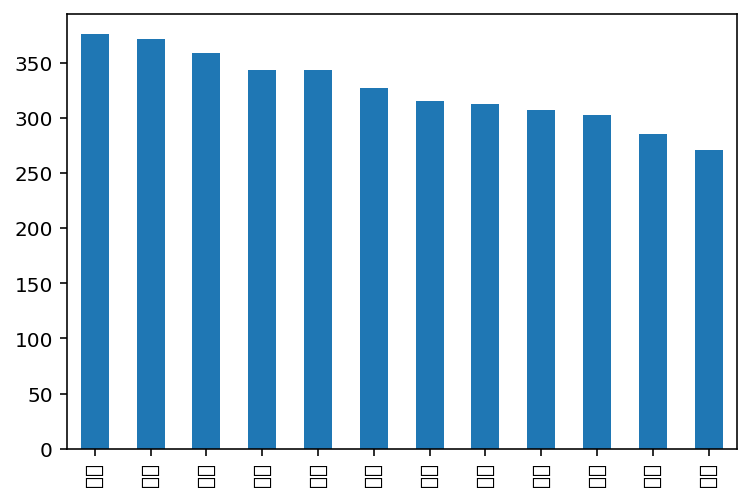

In [6]:
df['intent'].value_counts().plot(kind = 'bar')

In [7]:
okt = Okt()
X_train = []
for sentence in df.question:
    temp_X = []
    temp_X = okt.morphs(sentence)
    X_train.append(temp_X)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)

In [9]:
print(X_train[:3])

[[9, 237], [9, 136], [9, 140]]


In [10]:
print(tokenizer.word_index)

{'알려줘': 1, '오늘': 2, '명언': 3, '뭐': 4, '알려줘요': 5, '이': 6, '누구': 7, '지': 8, '날씨': 9, '몇': 10, '무슨': 11, '지금': 12, '주': 13, '해줘': 14, '뭔': 15, '시간': 16, '요': 17, '노래': 18, '알려주라': 19, '추천': 20, '상태': 21, '들려줘': 22, '말': 23, '공기': 24, '이슈': 25, '좀': 26, '이번': 27, '맛집': 28, '요즘': 29, '나': 30, '알려줄래': 31, '주변': 32, '내일': 33, '해줘요': 34, '며칠': 35, '이야': 36, '알려줄래요': 37, '의': 38, '좋은': 39, '에요': 40, '뉴스': 41, '사건': 42, '현재': 43, '이제': 44, '곧': 45, '날짜': 46, '번역': 47, '에게': 48, '인가요': 49, '되는': 50, '에': 51, '뜻': 52, '니': 53, '핫': 54, '거': 55, '미세먼지': 56, '하나': 57, '시야': 58, '어디': 59, '가장': 60, '화제': 61, '중국어': 62, '요일': 63, '있나요': 64, '인지': 65, '힘': 66, '들려줘요': 67, '누군지': 68, '일': 69, '궁금해': 70, '마스크': 71, '어떻게': 72, '우산': 73, '가': 74, '해주세요': 75, '해주라': 76, '멋진': 77, '바람': 78, '결과': 79, '다음': 80, '있니': 81, '알려주세요': 82, '프랑스어': 83, '전': 84, '라': 85, '영어': 86, '최근': 87, '시': 88, '치킨': 89, '음악': 90, '분': 91, '수': 92, '해줄래요': 93, '해줄래': 94, '어때': 95, '만': 96, '비': 97, '음식': 98, '야': 99, '아니': 100, '

In [11]:
vocab_size = len(tokenizer.word_index) + 1

샘플의 최대길이 :  10
샘플의 평균길이 :  4.077590607452782


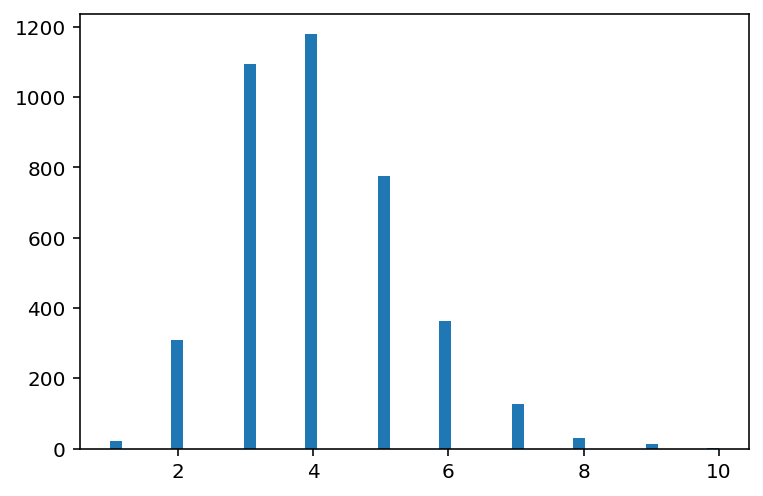

In [12]:
print('샘플의 최대길이 : ', max(len(x) for x in X_train))
print('샘플의 평균길이 : ', sum(map(len, X_train)) / len(X_train))

plt.hist([len(s) for s in X_train], bins = 50)
plt.show()

In [13]:
max_len = 10
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_train

array([[   9,  237,    0, ...,    0,    0,    0],
       [   9,  136,    0, ...,    0,    0,    0],
       [   9,  140,    0, ...,    0,    0,    0],
       ...,
       [1603,    7,    0, ...,    0,    0,    0],
       [1604,    7,    0, ...,    0,    0,    0],
       [1605,    7,    0, ...,    0,    0,    0]], dtype=int32)

In [14]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(df['intent'])

y_train = idx_encode.transform(df['intent'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))

print(label_idx)

{'날씨': 0, '뉴스': 1, '달력': 2, '맛집': 3, '먼지': 4, '명언': 5, '번역': 6, '시간': 7, '위키': 8, '음악': 9, '이슈': 10, '인물': 11}


In [15]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

idx_label    

{0: '날씨',
 1: '뉴스',
 2: '달력',
 3: '맛집',
 4: '먼지',
 5: '명언',
 6: '번역',
 7: '시간',
 8: '위키',
 9: '음악',
 10: '이슈',
 11: '인물'}

In [16]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_idx), activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 15, batch_size = 64)

Epoch 1/15
62/62 [==============================] - 33s 10ms/step - loss: 2.1411 - acc: 0.1841
Epoch 2/15
62/62 [==============================] - 1s 9ms/step - loss: 1.1915 - acc: 0.5045
Epoch 3/15
62/62 [==============================] - 1s 9ms/step - loss: 0.7088 - acc: 0.7630
Epoch 4/15
62/62 [==============================] - 1s 15ms/step - loss: 0.3705 - acc: 0.9039
Epoch 5/15
62/62 [==============================] - 1s 9ms/step - loss: 0.2018 - acc: 0.9432
Epoch 6/15
62/62 [==============================] - 1s 9ms/step - loss: 0.1121 - acc: 0.9703
Epoch 7/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0728 - acc: 0.9818
Epoch 8/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0815 - acc: 0.9805
Epoch 9/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0621 - acc: 0.9829
Epoch 10/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0271 - acc: 0.9924
Epoch 11/15
62/62 [==============================] - 1s 9ms/step -

---

***간략히 챗봇 제작 전 내용 상기를 위해 간단한 훈련을 진행***

오직 1개의 오픈 데이터셋을 받아 특정 질문에 대한 인텐트 예측 모델을 구성시켜 봄

  - 위 학습은 '질문'과 '인텐트'로 구성되어 있는 데이터셋을 활용하여 진행
  - 토큰화 정수화
  - index to label과 label to index 딕셔너리를 구성
  - LSTM 을 통한 학습

---

In [23]:
# 형태소 분석
# 토큰화
# 패딩 

def question_processing(sentences):
    inputs = []
    for sentence in sentences:
        sentence = okt.morphs(sentence) 
        encoded = tokenizer.texts_to_sequences([sentence])
        inputs.append(encoded[0])
    padded_inputs = pad_sequences(inputs, maxlen=max_len, padding='post')
    return padded_inputs

In [24]:
input_sentence = question_processing(['서울 날씨 어때?', 
                                      '나는 전주 날씨 궁금함',
                                      '안중근 의사는 누구야?',
                                      '이순신 장군님은 어떤 사람이니?',
                                      '명동 맛있는 음식점 있니?'
                                     ])

In [25]:
input_sentence

array([[ 147,    9,   95,    0,    0,    0,    0,    0,    0,    0],
       [  30,  126,  134,    9,    0,    0,    0,    0,    0,    0],
       [1593,  126,    7,   99,    0,    0,    0,    0,    0,    0],
       [1547,  253,  122,  332,  231,    0,    0,    0,    0,    0],
       [ 107,  101,   81,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [26]:
prediction = np.argmax(model.predict(input_sentence), axis=1)
print(prediction)

[ 0  4 11  9  3]


In [27]:
for p in prediction:
    print(idx_label[p])

날씨
먼지
인물
음악
맛집


***상위는 생성한 모델을 통해 예측 테스트를 진행한 결과***

---

In [28]:
names = ['안중근', '이순신', '세종대왕', '김광석', '아이유', '에미넴', '이건희', '고아라', '유재석', '한석희', '최민성']
def question_generator(names):
    question = []
    for name in names:
        s1 = name+'는 어떤 분이야?'
        s2 = name+'은 어떤 사람이니?'
        s3 = name+'이란 사람에 대해 궁금해'
        question = question+[s1, s2, s3]
    return question
question = question_generator(names)

In [29]:
question

['안중근는 어떤 분이야?',
 '안중근은 어떤 사람이니?',
 '안중근이란 사람에 대해 궁금해',
 '이순신는 어떤 분이야?',
 '이순신은 어떤 사람이니?',
 '이순신이란 사람에 대해 궁금해',
 '세종대왕는 어떤 분이야?',
 '세종대왕은 어떤 사람이니?',
 '세종대왕이란 사람에 대해 궁금해',
 '김광석는 어떤 분이야?',
 '김광석은 어떤 사람이니?',
 '김광석이란 사람에 대해 궁금해',
 '아이유는 어떤 분이야?',
 '아이유은 어떤 사람이니?',
 '아이유이란 사람에 대해 궁금해',
 '에미넴는 어떤 분이야?',
 '에미넴은 어떤 사람이니?',
 '에미넴이란 사람에 대해 궁금해',
 '이건희는 어떤 분이야?',
 '이건희은 어떤 사람이니?',
 '이건희이란 사람에 대해 궁금해',
 '고아라는 어떤 분이야?',
 '고아라은 어떤 사람이니?',
 '고아라이란 사람에 대해 궁금해',
 '유재석는 어떤 분이야?',
 '유재석은 어떤 사람이니?',
 '유재석이란 사람에 대해 궁금해',
 '한석희는 어떤 분이야?',
 '한석희은 어떤 사람이니?',
 '한석희이란 사람에 대해 궁금해',
 '최민성는 어떤 분이야?',
 '최민성은 어떤 사람이니?',
 '최민성이란 사람에 대해 궁금해']

In [30]:
new_data = {'question' : question, 'intent' : ['인물']*len(question)}
add_df = pd.DataFrame(new_data, columns=('question', 'intent'))

In [31]:
add_df.tail()

,question,intent
28,한석희은 어떤 사람이니?,인물
29,한석희이란 사람에 대해 궁금해,인물
30,최민성는 어떤 분이야?,인물
31,최민성은 어떤 사람이니?,인물
32,최민성이란 사람에 대해 궁금해,인물


In [32]:
new_df = pd.concat([df, add_df])
print(len(new_df))

3951


***기존 트레인 데이터와 Concatenate***

기존 학습데이터에 활용된 intent 이다.

  {0: '날씨',\
  1: '뉴스',\
  2: '달력',\
  3: '맛집',\
  4: '먼지',\
  5: '명언',\
  6: '번역',\
  7: '시간',\
  8: '위키',\
  9: '음악',\
  10: '이슈',\
  11: '인물'}

  여기에 인물에 대한 intent 및 질문을 추가하였다.



In [33]:
new_df

,question,intent
0,날씨 좋아,날씨
1,날씨 좋니,날씨
2,날씨 어떠니,날씨
3,영월 날씨 좋니,날씨
4,오늘 비 오나요,날씨
...,...,...
28,한석희은 어떤 사람이니?,인물
29,한석희이란 사람에 대해 궁금해,인물
30,최민성는 어떤 분이야?,인물
31,최민성은 어떤 사람이니?,인물


In [34]:
X_train = []
for sentence in new_df.question:
    temp_X = []
    temp_X = okt.morphs(sentence)
    X_train.append(temp_X)

In [35]:
print(X_train[:3])

[['날씨', '좋아'], ['날씨', '좋니'], ['날씨', '어떠니']]


In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [37]:
X_train = tokenizer.texts_to_sequences(X_train)

In [38]:
vocab_size = len(tokenizer.word_index) + 1

In [39]:
max_len = 10
X_train = pad_sequences(X_train, maxlen = max_len, padding='post')

In [40]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(new_df['intent'])

y_train = idx_encode.transform(new_df['intent'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'날씨': 0, '뉴스': 1, '달력': 2, '맛집': 3, '먼지': 4, '명언': 5, '번역': 6, '시간': 7, '위키': 8, '음악': 9, '이슈': 10, '인물': 11}


In [41]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

In [42]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_idx), activation='softmax'))

In [43]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 15, batch_size = 64)

Epoch 1/15
62/62 [==============================] - 4s 10ms/step - loss: 2.0935 - acc: 0.2338
Epoch 2/15
62/62 [==============================] - 1s 15ms/step - loss: 0.3740 - acc: 0.8876
Epoch 3/15
62/62 [==============================] - 1s 10ms/step - loss: 0.1721 - acc: 0.9516
Epoch 4/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0997 - acc: 0.9732
Epoch 5/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0567 - acc: 0.9831
Epoch 6/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0510 - acc: 0.9860
Epoch 7/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0564 - acc: 0.9859
Epoch 8/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0453 - acc: 0.9875
Epoch 9/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0401 - acc: 0.9880
Epoch 10/15
62/62 [==============================] - 1s 9ms/step - loss: 0.0387 - acc: 0.9905
Epoch 11/15
62/62 [==============================] - 1s 9ms/step -

In [44]:
input_sentence = question_processing(['서울 날씨 어때?', 
                                      '나는 전주 날씨 궁금함',
                                      '안중근 의사는 누구야?',
                                      '이순신 장군님은 어떤 사람이니?',
                                      '명동 맛있는 음식점 있니?'
                                     ])

In [45]:
input_sentence

array([[150,   9,  96, 149,   0,   0,   0,   0,   0,   0],
       [ 30,  99, 136,   9,   0,   0,   0,   0,   0,   0],
       [434,  99,   7, 101, 149,   0,   0,   0,   0,   0],
       [433, 166,  74, 135, 154, 149,   0,   0,   0,   0],
       [109, 103,  83, 149,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [46]:
prediction = np.argmax(model.predict(input_sentence), axis=1)
print(prediction)

[ 0  0 11 11  3]


In [47]:
for p in prediction:
    print(idx_label[p])

날씨
날씨
인물
인물
맛집
